<a href="https://colab.research.google.com/github/alfakiat/CI_ML_Project/blob/main/Waleed_Alfakiat_CI_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlFaModule Class Documentation

## Overview
The `AlFaModule` class is designed to streamline the process of machine learning model training and evaluation, specifically tailored for binary classification tasks such as Advocates. It encapsulates functionalities for dataset loading, preprocessing, model initialization, training, tuning, and visualization.

## Class Attributes
- `df`: DataFrame object to hold the dataset.
- `models`: Dictionary to store initialized machine learning models.
- `metrics`: Dictionary to store performance metrics of models.
- `best_models`: Dictionary to store models with the best parameters after tuning.
- `tuned_metrics`: Dictionary to store performance metrics of tuned models.
- `features`: List to store feature names of the dataset.
- `target_class`: String to store the name of the target column.
- `X_train`, `X_test`, `y_train`, `y_test`: Variables to hold training and testing data.

## Methods

### `__init__(self)`
Constructor to initialize the class attributes.

### `loadDataset(self, dataset_path, target_column_name)`
Loads the dataset from a CSV file and sets up features and target class attributes.
- `dataset_path`: Path to the CSV file.
- `target_column_name`: Name of the target column in the dataset.

### `expandDataset(self, n_samples=10000)`
Expands the dataset using SMOTE.
- `n_samples`: Number of synthetic samples to generate.

### `fillNullForward(self)`
Handles missing values in the dataset using the forward fill method.

### `printDict(self, dict, with_round=0)`
Prints a dictionary as a formatted table.
- `dict`: Dictionary to print.
- `with_round`: Decimal places to round the values to.

### `handleOutliers(self)`
Handles outliers in the dataset for each feature using the Interquartile Range (IQR) method.

### `scaleAttributes(self, scaler_type='standard')`
Scales the numerical attributes in the dataset using a specified scaler

### `visulaizeDistributions(self)`
Visualizes the distributions of features using histograms.

### `visulaizeCorrelations(self)`
Visualizes feature correlations using a heatmap.

### `initClassificationAlgorithms(self)`
Initializes common classification algorithms and splits the dataset into training and testing sets.

### `train(self)`
Trains the initialized models and evaluates their performance using confusion matrices and calculates performance metrics.

### `trainWithTuning(self)`
Performs hyperparameter tuning for each model using Grid Search and evaluates the tuned models.

### `showDiffirentTraining(self)`
Visualizes the differences in performance metrics between original and tuned models using bar plots.

## Usage Example
```python
# Initialize the module
module = AlFaModule()

# Load the dataset (you can select a dataset file from "Files" tab, or upload `advocates.csv` file then place path here with target class)
module.loadDataset('path/to/advocates.csv', 'Advocate')

# Expand the dataset
module.expandDataset(n_samples=5000)

# Fill missing values
module.fillNullForward()

# Handle outliers
module.handleOutliers()

# Scale attributes
module.scaleAttributes('robust')

# Visualize data distributions
module.visulaizeDistributions()

# Visualize feature correlations
module.visulaizeCorrelations()

# Initialize classification algorithms
module.initClassificationAlgorithms()

# Train models
module.train()

# Train models with hyperparameter tuning
module.trainWithTuning()

# Show differences in training
module.showDiffirentTraining()
```

## How to Run
1. Upload dataset file from `Files` tab, then place dataset path with target class using `loadDataset` method:
```
module.loadDataset('path/to/advocates.csv', 'Advocate')
```
2. From `Runtime` option, select `Run all` or `Ctrl+F9` to run all cells and show the greatest results.

## Install required lib

In [17]:
!pip install imbalanced-learn

## Import lib

In [18]:
import functools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Define helper classes

In [19]:
def trace_all_methods(cls):

    for key, value in cls.__dict__.items():
        if callable(value):
            setattr(cls, key, trace(value))
    return cls

def trace(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print(f"########\n>>>>>>>> Starting: {func.__name__}...\n########")
        return func(*args, **kwargs)
    return wrapper


## Define AlFa Module: A machine learning module

In [20]:
@trace_all_methods
class AlFaModule:

    def __init__(self):
        self.df = None
        self.models = {}
        self.metrics = {}
        self.best_models = {}
        self.tuned_metrics = {}
        self.features = []
        self.target_class = None
        self.X_train = self.X_test = self.y_train = self.y_test = None

    def loadDataset(self, dataset_path, target_column_name):
        # Load the dataset from csv file
        self.df = pd.read_csv(dataset_path)

        # Replace features list with the headers from the dataset
        self.features = list(self.df.columns)

        # Remove the target column name from features
        self.features.remove(target_column_name)

        # Set the target class attribute
        self.target_class = target_column_name

    def expandDataset(self, n_samples = 10000):
        # Ensure the dataset is loaded and not empty
        if self.df is None or self.df.empty:
            raise ValueError("Dataset is not loaded or is empty.")

        # Ensure the target class is set
        if self.target_class is None:
            raise ValueError("Target class is not set.")

        # Split the dataset into features and target
        X = self.df.drop(self.target_class, axis=1)
        y = self.df[self.target_class]

        # Initialize the SMOTE object
        smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=55)

        # Generate synthetic samples
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Combine the resampled features and target into one DataFrame
        synthetic_df = pd.DataFrame(X_resampled, columns=self.features)
        synthetic_df[self.target_class] = y_resampled

        # Append the synthetic data to the original DataFrame
        self.df = pd.concat([self.df, synthetic_df.tail(n_samples)], ignore_index=True)

    def fillNullForward(self):
        # Handling missing values using forward fill
        self.df.fillna(method='ffill', inplace=True)

    def printDict(self, dict, with_round=0):
        # Convert the dictionary into a DataFrame for a tabular view
        df = pd.DataFrame.from_dict(dict, orient='index')
        # Check round for DF values
        if with_round > 0:
            df = df.round(with_round)
        # Display the DataFrame
        print(df)

    def handleOutliers(self):
        # Handling outliers for each feature
        for feature in self.features:
            q1 = self.df[feature].quantile(0.25)
            q3 = self.df[feature].quantile(0.75)
            iqr = q3 - q1
            filter = (self.df[feature] >= q1 - 1.5 * iqr) & (self.df[feature] <= q3 + 1.5 * iqr)
            self.df = self.df.loc[filter]

    def scaleAttributes(self, scaler_type='standard'):
        # Scales the numerical attributes in the dataset using a specified scaler

        if self.df is None or self.df.empty:
            raise ValueError("Dataset is not loaded or is empty.")

        # Select numerical columns for scaling
        numerical_columns = self.df.select_dtypes(include=['float64', 'int64']).columns

        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        else:
            raise ValueError("Invalid scaler type. Choose 'standard', 'minmax', or 'robust'.")

        # Fit and transform the numerical features
        self.df[numerical_columns] = scaler.fit_transform(self.df[numerical_columns])

    def visulaizeDistributions(self):
        # Visualize distributions using histograms
        for feature in self.features:
            plt.hist(self.df[feature], bins=20)
            plt.title(f'{feature} Distribution')
            plt.show()

    def visulaizeCorrelations(self):
        # Advanced: Explore feature correlations
        corr_matrix = self.df[self.features].corr()
        sns.heatmap(corr_matrix, annot=False)
        plt.show()

    def initClassificationAlgorithms(self):
        # Split the dataset
        X = self.df.drop(self.target_class, axis=1)  # Features
        y = self.df[self.target_class]  # Target variable (class)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # Model selection
        self.models = {
            'KNN': KNeighborsClassifier(),
            'SVM': SVC(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'XGBoost': XGBClassifier(),
        }

    def train(self):
        # Train the models
        for model_name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
        # Evaluate the models
        y_preds = {}
        for model_name, model in self.models.items():
            y_preds[model_name] = model.predict(self.X_test)
        # Confusion Matrix for results
        for model_name, y_pred in y_preds.items():
            cm = confusion_matrix(self.y_test, y_pred)
            sns.heatmap(cm, annot=True)
            plt.title(f'{model_name} Confusion Matrix')
            plt.show()
        # Calculate metrics
        for model_name, y_pred in y_preds.items():
            self.metrics[model_name] = {
                'accuracy': accuracy_score(self.y_test, y_pred),
                'precision': precision_score(self.y_test, y_pred, average='weighted'),
                'recall': recall_score(self.y_test, y_pred, average='weighted'),
                'f1_score': f1_score(self.y_test, y_pred, average='weighted')
            }
        self.printDict(self.metrics)

    def trainWithTuning(self):
        # Define the parameter grid for each model
        param_grid = {
            'KNN': {'n_neighbors': [3, 5, 7, 9]},
            'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 4]},
            'SVM': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
            'Random Forest': {'n_estimators': [100, 200], 'max_features': ['log2', 'sqrt']},
            'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
        }
        # Perform Grid Search
        for model_name, model in self.models.items():
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='f1')
            grid_search.fit(self.X_train, self.y_train)
            self.best_models[model_name] = grid_search.best_estimator_
        # Use best_models to predict and evaluate
        y_tuned_preds = {}
        for model_name, model in self.best_models.items():
            y_tuned_preds[model_name] = model.predict(self.X_test)
        # Confusion Matrix for results
        for model_name, y_pred in y_tuned_preds.items():
            cm = confusion_matrix(self.y_test, y_pred)
            sns.heatmap(cm, annot=True)
            plt.title(f'{model_name} Confusion Matrix')
            plt.show()
        # Calculate metrics for each model
        for model_name, y_pred in y_tuned_preds.items():
            self.tuned_metrics[model_name] = {
                'accuracy': accuracy_score(self.y_test, y_pred),
                'precision': precision_score(self.y_test, y_pred, average='weighted'),
                'recall': recall_score(self.y_test, y_pred, average='weighted'),
                'f1_score': f1_score(self.y_test, y_pred, average='weighted')
            }
        print(self.best_models, "\n")
        self.printDict(self.tuned_metrics)

    def showDiffirentTraining(self):
        # Names of the models
        model_names = list(self.models.keys())
        # Metrics to plot
        metric_names = ['accuracy', 'precision', 'recall', 'f1_score']
        # Number of models
        n_models = len(self.metrics)
        # Create a figure and a set of subplots
        fig, axs = plt.subplots(len(metric_names), figsize=(10, 15))
        # Plot each metric
        for i, metric in enumerate(metric_names):
            original_scores = [self.metrics[model][metric] for model in model_names]
            tuned_scores = [self.tuned_metrics[model][metric] for model in model_names]
            # Set position of bar on X axis
            r1 = np.arange(len(original_scores))
            r2 = [x + 0.25 for x in r1]
            # Make the plot
            axs[i].bar(r1, original_scores, color='b', width=0.25, label='Original')
            axs[i].bar(r2, tuned_scores, color='g', width=0.25, label='Tuned')
            # Add labels
            axs[i].set_ylabel(metric)
            axs[i].set_xticks([r + 0.25 for r in range(len(original_scores))])
            axs[i].set_xticklabels(model_names)
            axs[i].legend()
        # Show the plot
        plt.tight_layout()
        plt.show()


## Execute and test AlFa Module then show the results

########
>>>>>>>> Starting: __init__...
########
########
>>>>>>>> Starting: loadDataset...
########
########
>>>>>>>> Starting: expandDataset...
########
########
>>>>>>>> Starting: fillNullForward...
########
########
>>>>>>>> Starting: handleOutliers...
########
########
>>>>>>>> Starting: scaleAttributes...
########
########
>>>>>>>> Starting: visulaizeDistributions...
########


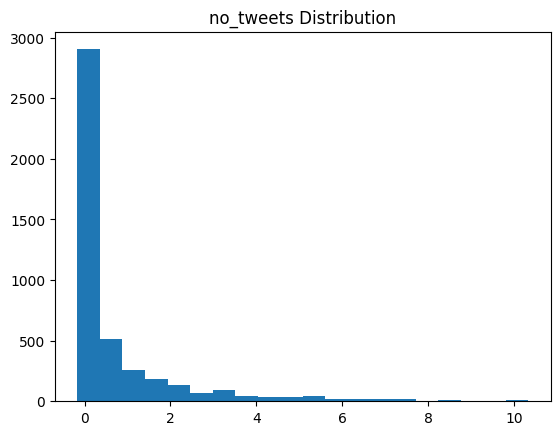

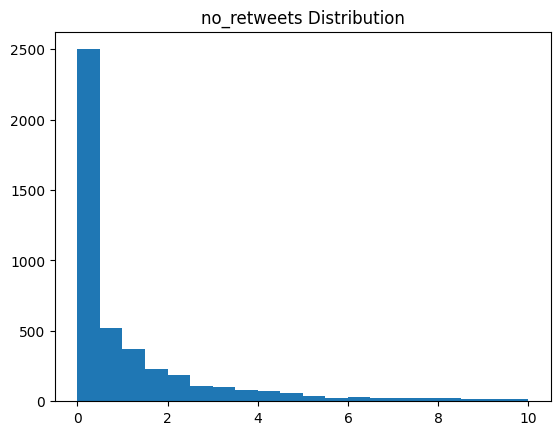

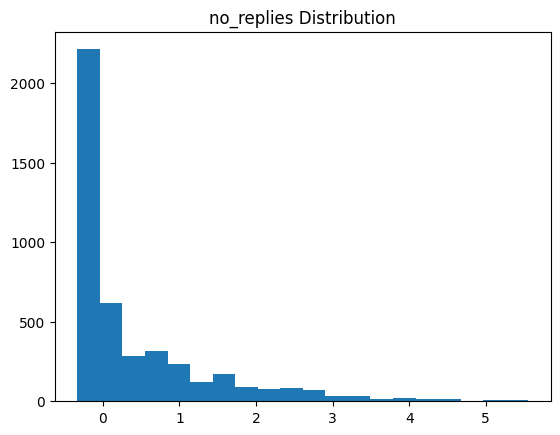

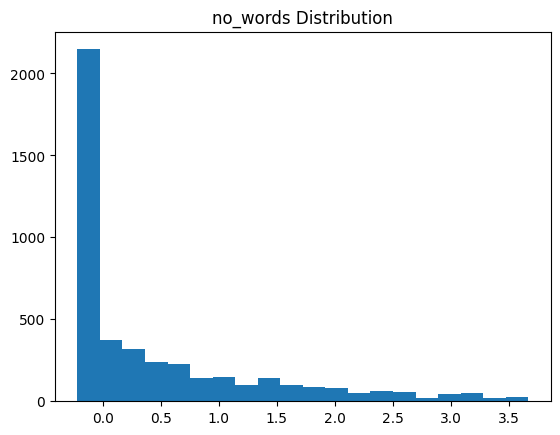

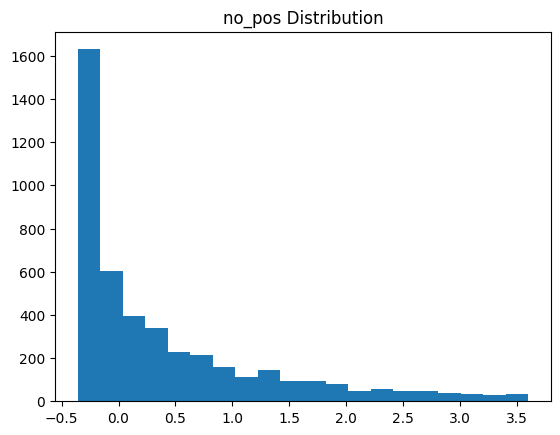

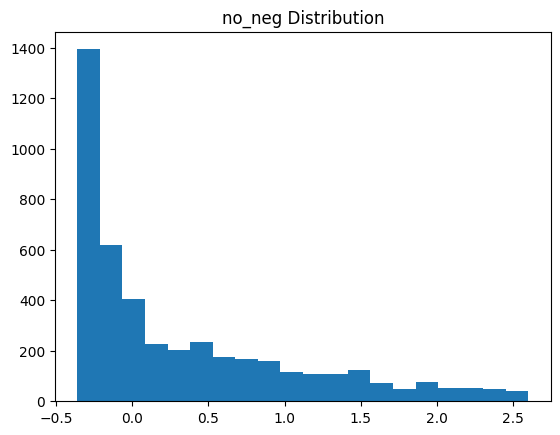

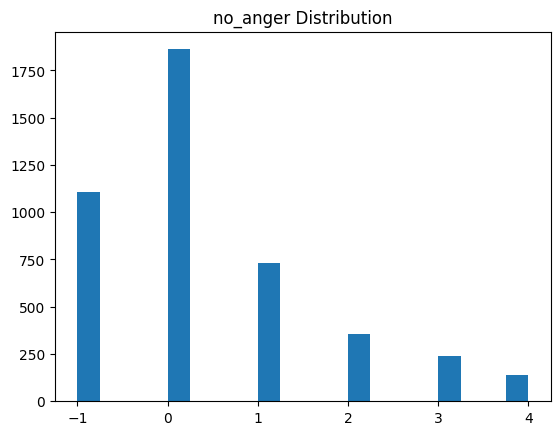

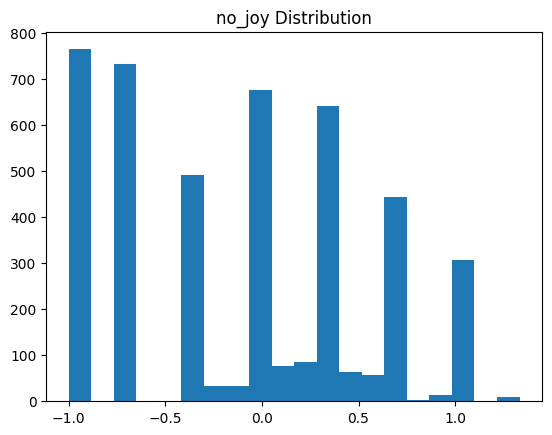

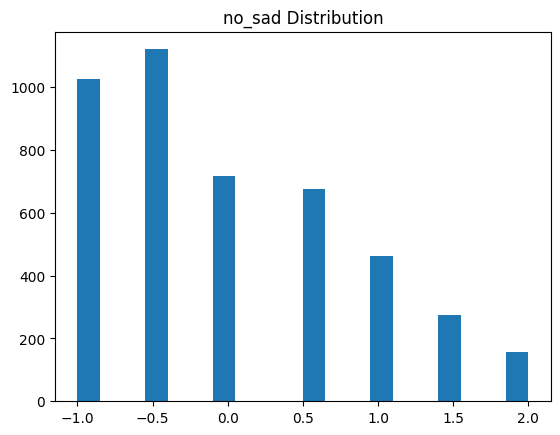

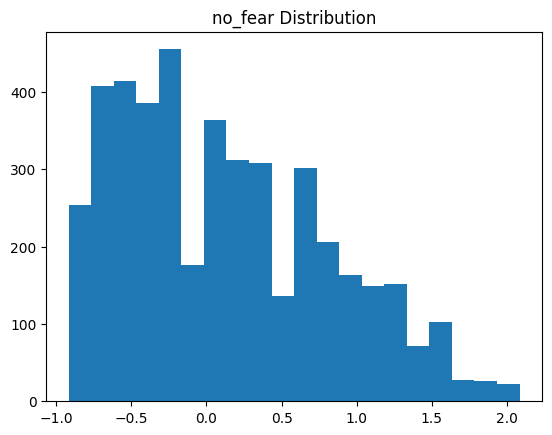

########
>>>>>>>> Starting: visulaizeCorrelations...
########


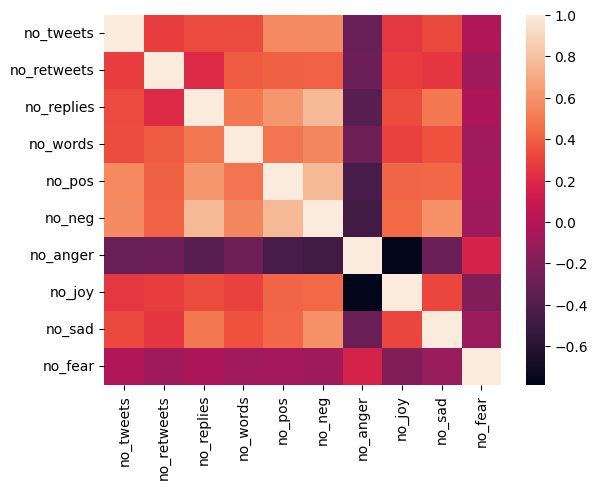

########
>>>>>>>> Starting: initClassificationAlgorithms...
########
########
>>>>>>>> Starting: train...
########


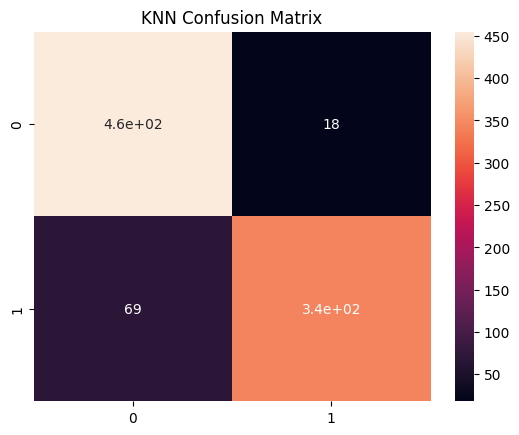

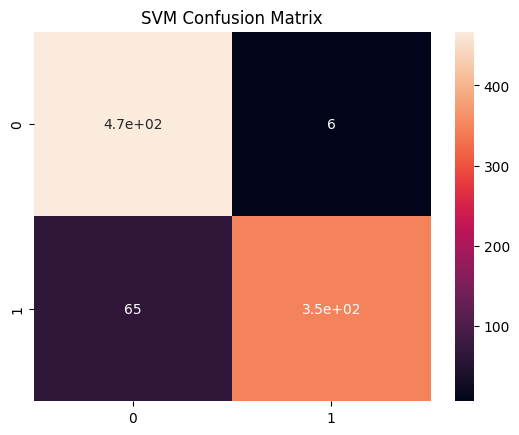

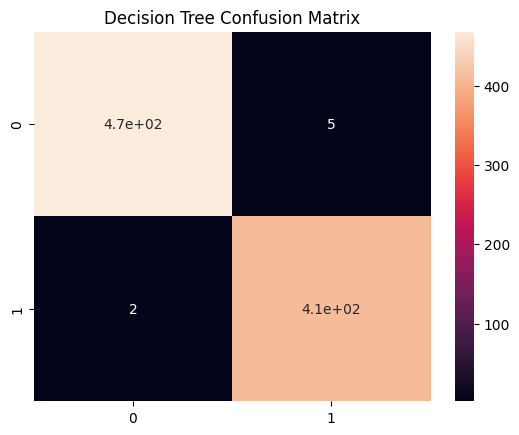

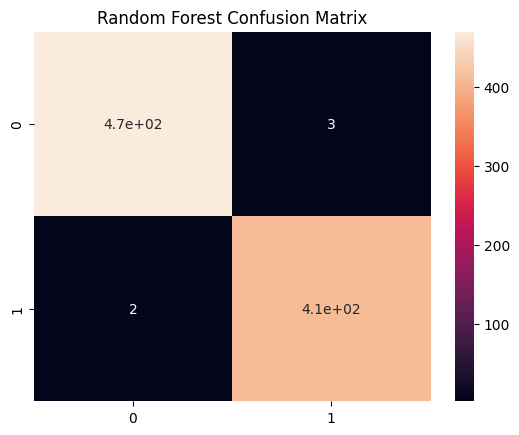

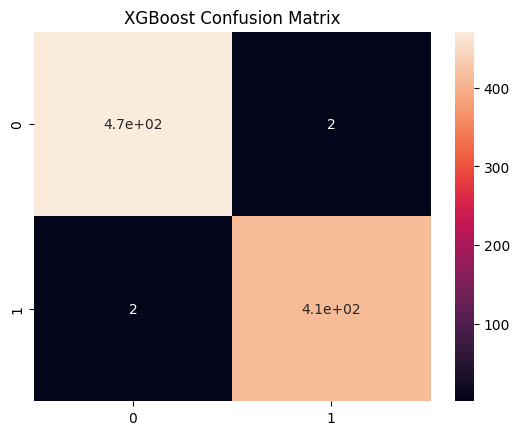

########
>>>>>>>> Starting: printDict...
########
               accuracy  precision    recall  f1_score
KNN            0.901806   0.906523  0.901806  0.901086
SVM            0.919865   0.926872  0.919865  0.919135
Decision Tree  0.992099   0.992126  0.992099  0.992101
Random Forest  0.994357   0.994360  0.994357  0.994357
XGBoost        0.995485   0.995485  0.995485  0.995485
########
>>>>>>>> Starting: trainWithTuning...
########


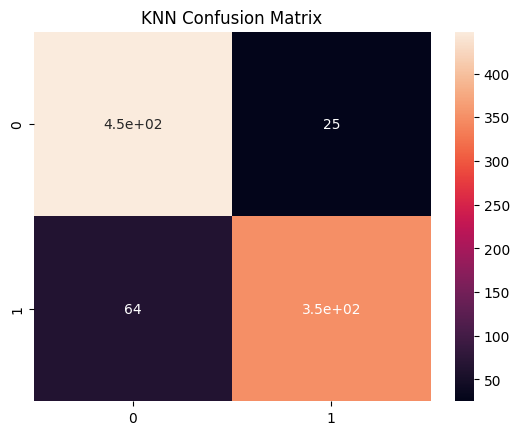

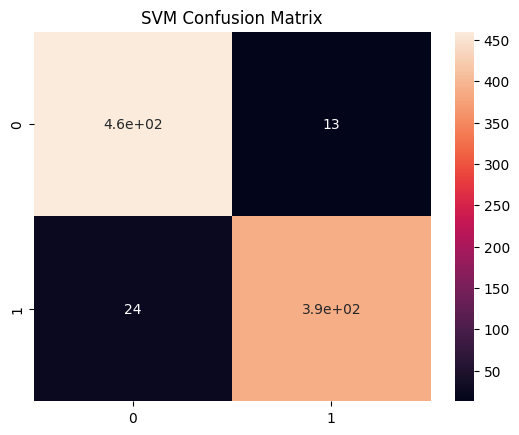

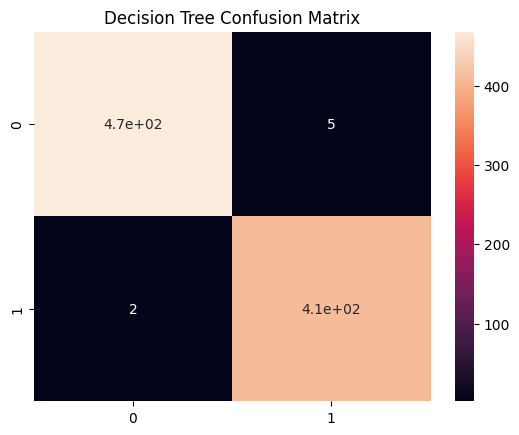

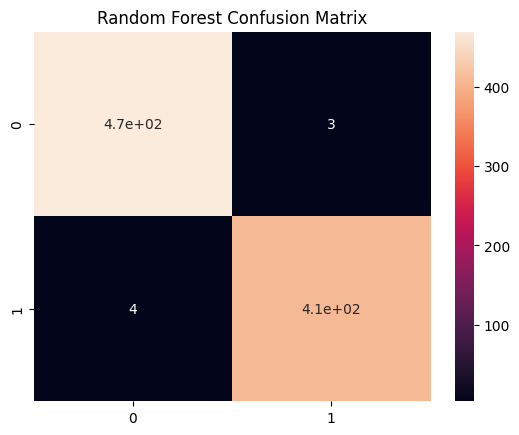

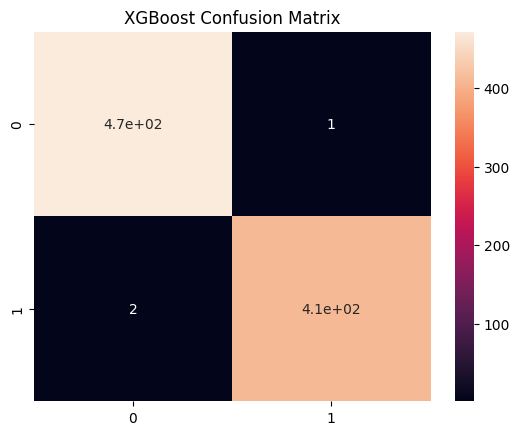

{'KNN': KNeighborsClassifier(n_neighbors=3), 'SVM': SVC(C=10, gamma='auto'), 'Decision Tree': DecisionTreeClassifier(max_depth=20), 'Random Forest': RandomForestClassifier(), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)} 

########
>>>>>>>> Starting: printDict...
########
     

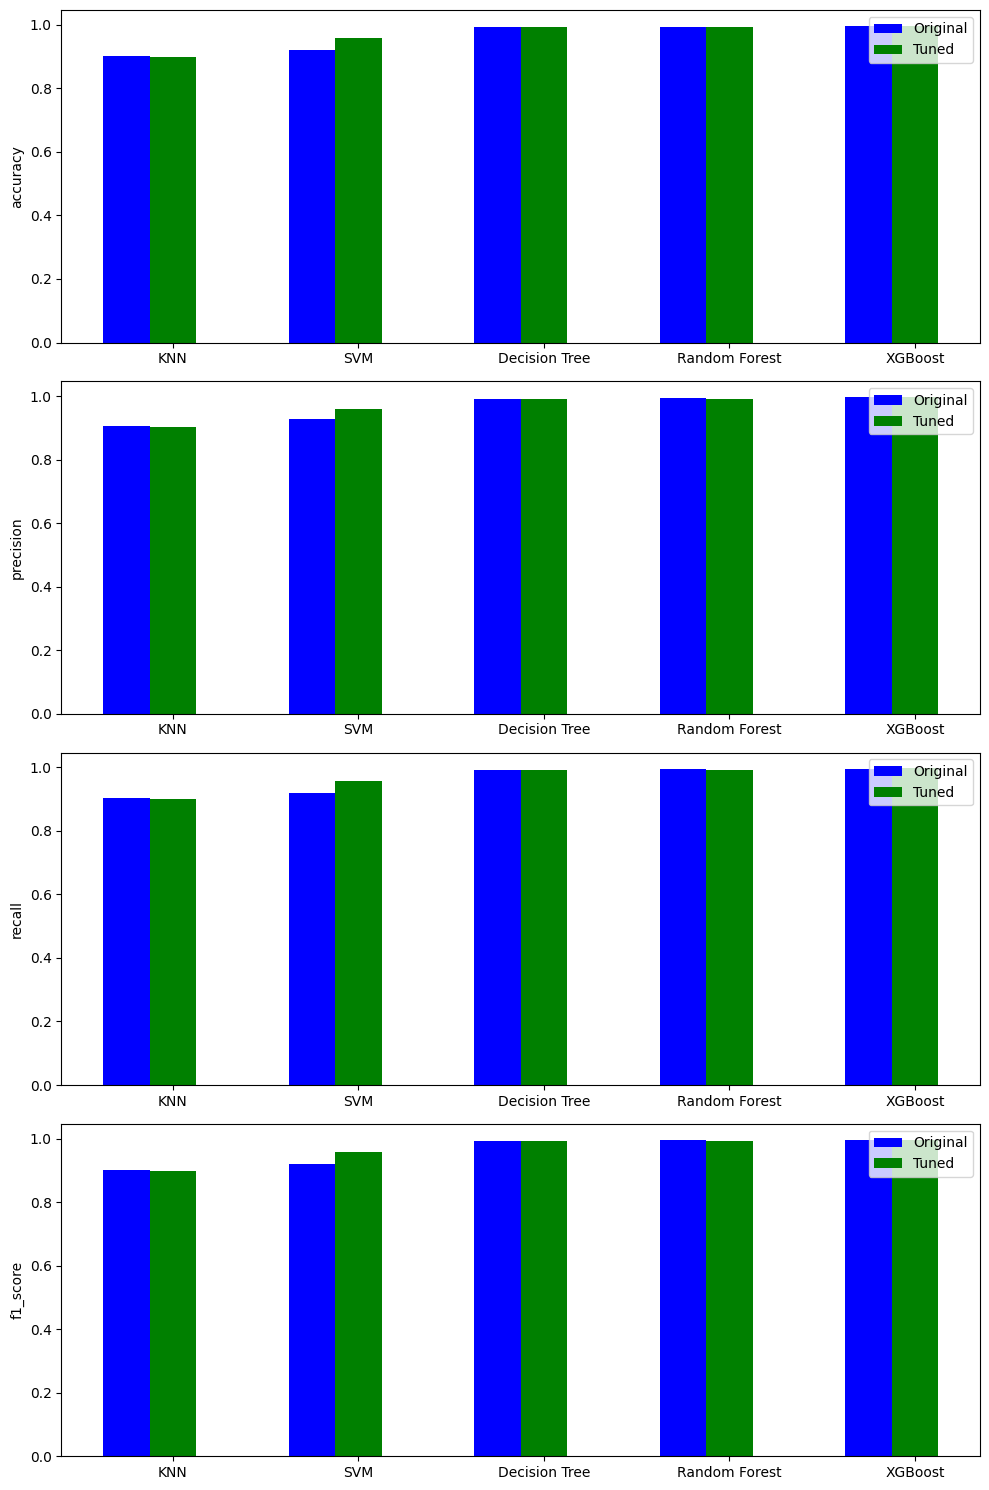

In [21]:
# Init AlFa Module instance
alfa_module = AlFaModule()

# Load dataset and data preprocess
alfa_module.loadDataset('advocates.csv', 'Advocate')
# Expand Dataset
alfa_module.expandDataset(10000)
# Fill null values
alfa_module.fillNullForward()
# Handle outliers
alfa_module.handleOutliers()

# Scale attributes
alfa_module.scaleAttributes('robust')

# Display attributes distributions and correlations
alfa_module.visulaizeDistributions()
alfa_module.visulaizeCorrelations()

# Init Classification algorithms
alfa_module.initClassificationAlgorithms()
# Train module with default hyperparameters
alfa_module.train()
# Tuning hyperparameters
alfa_module.trainWithTuning()

# Show difference of results between default hyperparameters and tuned hyperparameters
alfa_module.showDiffirentTraining()
